**Imported all the necessary librairies**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Read csv file

In [9]:
df=pd.read_csv("/content/Significant_Earthquakes (1).csv")
df.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,3,1901-12-30T22:34:00.000Z,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,4,1902-01-01T05:20:30.000Z,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


Descriptive Statistics

In [10]:
df.describe()

,Unnamed: 0,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,11472.000000,11472.000000,11472.000000,11188.000000,11472.000000,133.000000,133.000000,85.000000,133.000000,128.000000,11092.000000,11076.000000,135.000000
mean,5735.500000,18.995227,37.304580,27.450721,6.052158,7.872180,256.682707,1.206631,0.903865,14.739531,15.275761,0.298688,6.940741
std,3311.825478,29.111895,113.326052,46.089712,0.530369,3.222585,94.760708,0.600809,3.777672,26.374715,9.922940,0.145517,3.912786
min,0.000000,-69.722000,-179.989000,-4.000000,5.000000,0.000000,37.000000,0.167100,0.000000,0.640000,0.400000,0.009000,0.000000
25%,2867.750000,-3.208250,-72.004250,15.000000,5.700000,6.000000,184.000000,0.768900,0.340000,2.305000,6.000000,0.200000,4.000000
50%,5735.500000,26.924000,71.123000,15.000000,5.980000,8.000000,292.000000,1.156000,0.480000,5.315000,13.100000,0.230000,7.000000
75%,8603.250000,40.477000,140.259250,35.000000,6.310000,10.000000,335.000000,1.537000,0.620000,11.597500,25.000000,0.350000,10.000000
max,11471.000000,87.199000,180.000000,661.500000,9.500000,17.000000,360.000000,2.727000,42.410000,99.000000,73.000000,1.840000,14.000000


In [11]:
df.describe(include='object')

,time,magType,net,id,updated,place,type,status,locationSource,magSource
count,11472,11472,11472,11472,11472,11383,11472,11472,11472,11471
unique,11472,9,7,11472,11095,9313,2,2,8,42
top,1965-03-07T01:43:11.290Z,mw,iscgem,iscgem858401,2018-06-04T20:43:44.000Z,northern Mid-Atlantic Ridge,earthquake,reviewed,iscgem,iscgem
freq,1,11002,9870,1,318,113,11470,11459,9885,9869


Display Rows and Columns

In [12]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])
df.shape

Number of rows: 11472
Number of columns: 23


(11472, 23)

*Info* about dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11472 entries, 0 to 11471
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       11472 non-null  int64  
 1   time             11472 non-null  object 
 2   latitude         11472 non-null  float64
 3   longitude        11472 non-null  float64
 4   depth            11188 non-null  float64
 5   mag              11472 non-null  float64
 6   magType          11472 non-null  object 
 7   nst              133 non-null    float64
 8   gap              133 non-null    float64
 9   dmin             85 non-null     float64
 10  rms              133 non-null    float64
 11  net              11472 non-null  object 
 12  id               11472 non-null  object 
 13  updated          11472 non-null  object 
 14  place            11383 non-null  object 
 15  type             11472 non-null  object 
 16  horizontalError  128 non-null    float64
 17  depthError  

In [14]:
df.columns

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [15]:
df.dtypes

,0
Unnamed: 0,int64
time,object
latitude,float64
longitude,float64
depth,float64
mag,float64
magType,object
nst,float64
gap,float64
dmin,float64


droping irrrelevant column


In [16]:
df.drop(columns=['Unnamed: 0','id','updated','status'], axis=1, inplace=True)

# **Handling Missing Values**

In [17]:
df.isnull().sum() / len(df) * 100

,0
time,0.000000
latitude,0.000000
longitude,0.000000
depth,2.475593
mag,0.000000
magType,0.000000
nst,98.840656
gap,98.840656
dmin,99.259066
rms,98.840656


 Bar Graph – Missing Values per Column

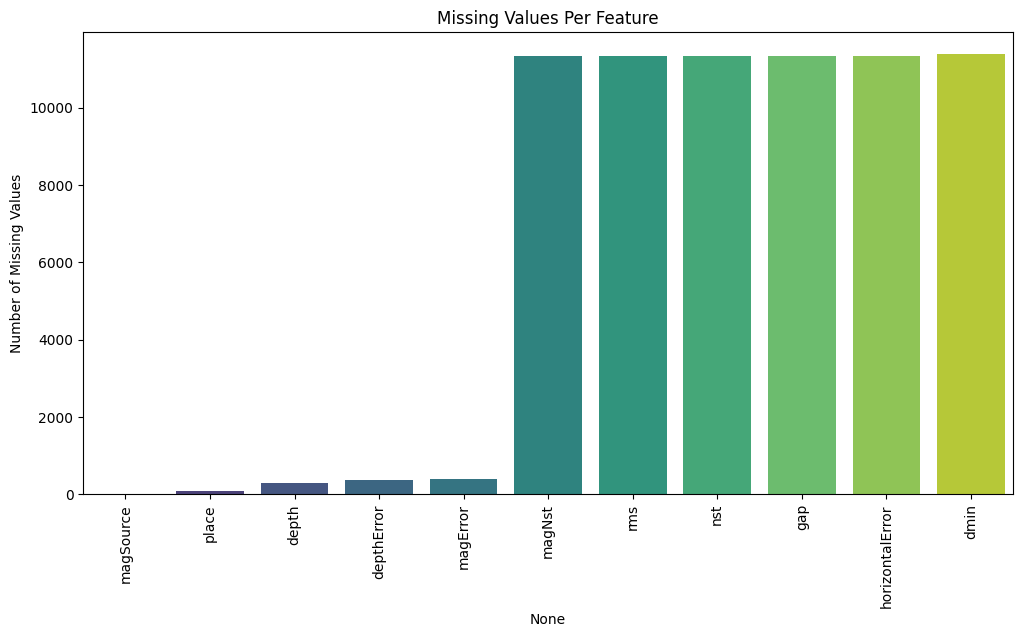

In [18]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values as a heatmap
plt.figure(figsize=(12, 6))
missing_values = missing_values.sort_values(ascending=True)
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Feature")
plt.show()

Histograms – Distribution of Numerical Columns

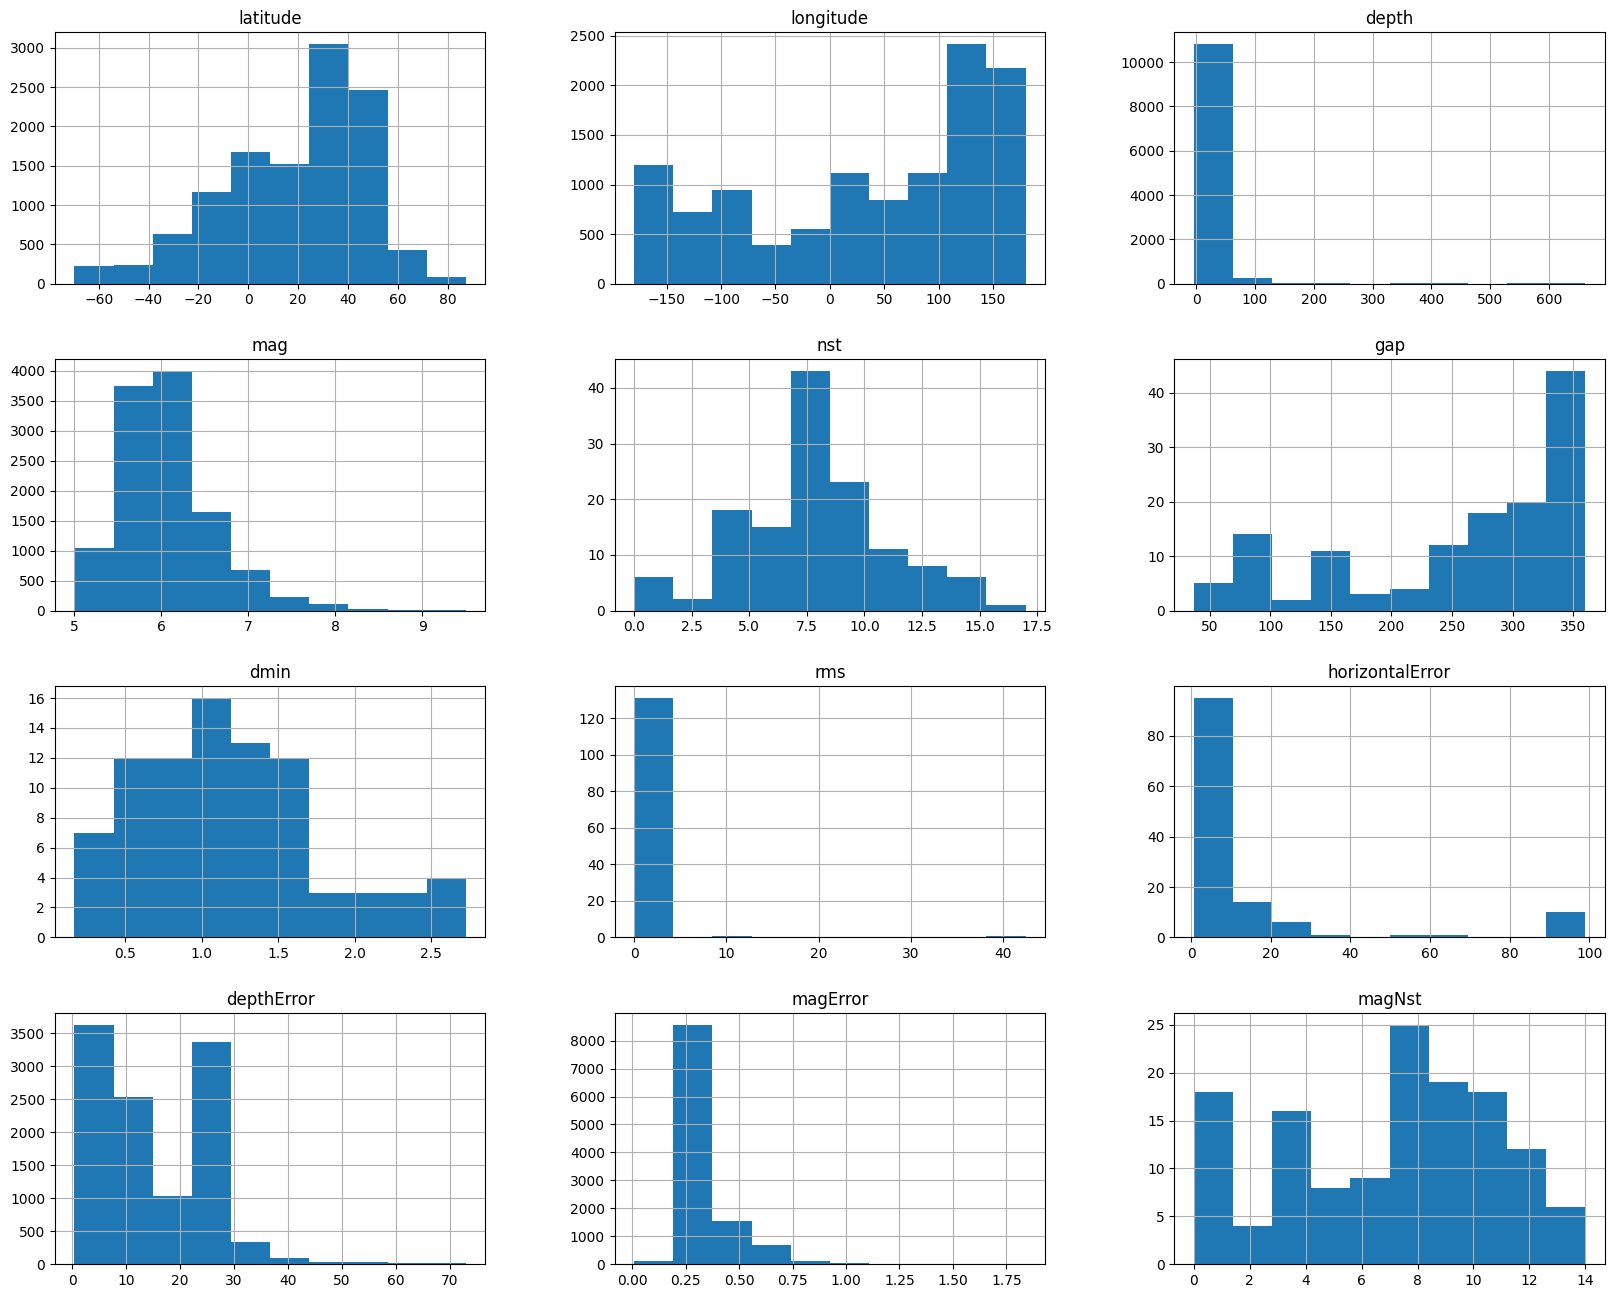

In [19]:
df.hist(figsize=[20,16])
plt.show()

In [20]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

Check skewness

In [21]:
# Check skewness
# If skewness is greater than ±0.5, the feature is skewed,median is a better choice

df[num_cols].skew()

,0
latitude,-0.639849
longitude,-0.572727
depth,9.773033
mag,0.974380
nst,-0.102287
gap,-0.876554
dmin,0.636962
rms,10.407891
horizontalError,2.661142
depthError,0.816037



Missing values were handled using the median imputation method for numerical columns and mode imputation for categorical columns

In [22]:
#missing value handling
df["depth"]=df["depth"].fillna(df["depth"].median())
df["rms"]=df["rms"].fillna(df["rms"].mean())
df["place"]=df["place"].fillna(df["place"].mode()[0])
df["depthError"]=df["depthError"].fillna(df["depthError"].mean())
df["magNst"]=df["magNst"].fillna(df["magNst"].median())
df["gap"]=df["gap"].fillna(df["gap"].median())
df["nst"]=df["nst"].fillna(df["nst"].median())
df["dmin"]=df["dmin"].fillna(df["dmin"].median())
df["horizontalError"]=df["horizontalError"].fillna(df["horizontalError"].median())
df["magError"]=df["magError"].fillna(df["magError"].median())

In [23]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0


# **Outliers**


 Box Plot – Identification of Outliers in Numerical Features

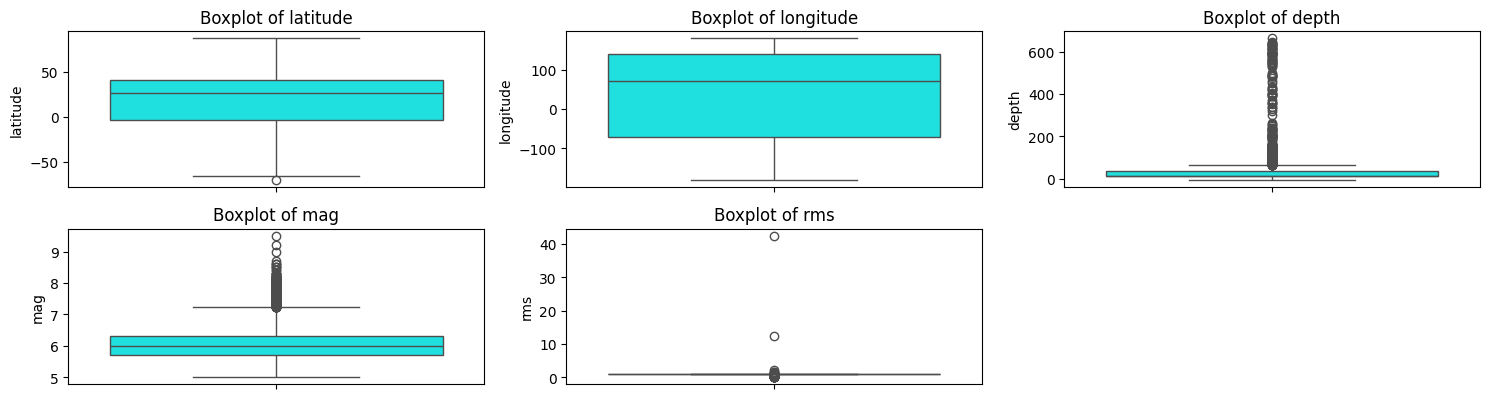

In [24]:
# List of numerical columns to analyze
num_col = ['latitude', 'longitude', 'depth', 'mag', 'rms']


plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

We choose not to remove outliers from the dataset because, in the context of earthquakes, outliers often represent significant or extreme seismic events. These events are crucial for accurate modeling and prediction. These extreme values are not errors; they are real and meaningful data points that reflect the unpredictable nature of natural disasters.

Removing outliers could lead to a loss of important information, especially since our goal is to build a model that can handle and predict rare but impactful events like high-magnitude earthquakes.

IQR Method to Find Outliers

In [25]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Check outliers for each column
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

outlier_counts

# If outliers represent real earthquake behavior, we should keep them


{'latitude': 1,
 'longitude': 0,
 'depth': 295,
 'mag': 375,
 'nst': 109,
 'gap': 131,
 'dmin': 83,
 'rms': 133,
 'horizontalError': 128,
 'depthError': 42,
 'magError': 857,
 'magNst': 122}

# **Feature Engineering**

Extracting Year and Month From Time

In [26]:
# making new column for month and year
#Convert to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract year and month
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

Extracting Country from place

In [27]:
# Extract the last word in the "place" column
df["country"] = df["place"].str.split(", ").str[-1]

# Display unique country values to check correctness
country_counts = df["country"].value_counts()

# Print each country and its count
for country, count in country_counts.items():
    print(f"{country}: {count}")

Japan: 964
Alaska: 807
Indonesia: 698
Russia: 684
Papua New Guinea: 451
Philippines: 442
Greece: 418
China: 361
Mexico: 281
Turkey: 278
Chile: 242
Taiwan: 222
Iran: 219
Vanuatu: 216
Tonga: 211
northern Mid-Atlantic Ridge: 202
India: 179
Solomon Islands: 160
California: 151
Japan region: 129
Italy: 117
New Zealand: 115
Peru: 103
Pakistan: 92
central Mid-Atlantic Ridge: 88
Kuril Islands: 87
South Sandwich Islands region: 86
Myanmar: 86
Nevada: 86
CA: 82
Kermadec Islands region: 79
Panama: 74
Tajikistan: 74
Canada: 68
Guatemala: 60
Costa Rica: 59
Ecuador: 58
Reykjanes Ridge: 54
South Indian Ocean: 52
Svalbard and Jan Mayen: 49
Kyrgyzstan: 49
MX: 48
southeast of the Loyalty Islands: 47
Afghanistan: 47
New Caledonia: 45
east of the Kuril Islands: 45
Nicaragua: 44
Albania: 43
Colombia: 43
west of Macquarie Island: 41
southern East Pacific Rise: 41
south of the Kermadec Islands: 39
Fiji: 38
Portugal: 36
north of Ascension Island: 36
Mid-Indian Ridge: 36
Mongolia: 35
Argentina: 33
Timor Leste:

In [28]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'locationSource', 'magSource',
       'year', 'month', 'country'],
      dtype='object')

# **Univariate Analysis**

 Histograms –Distribution Plots of Key Features

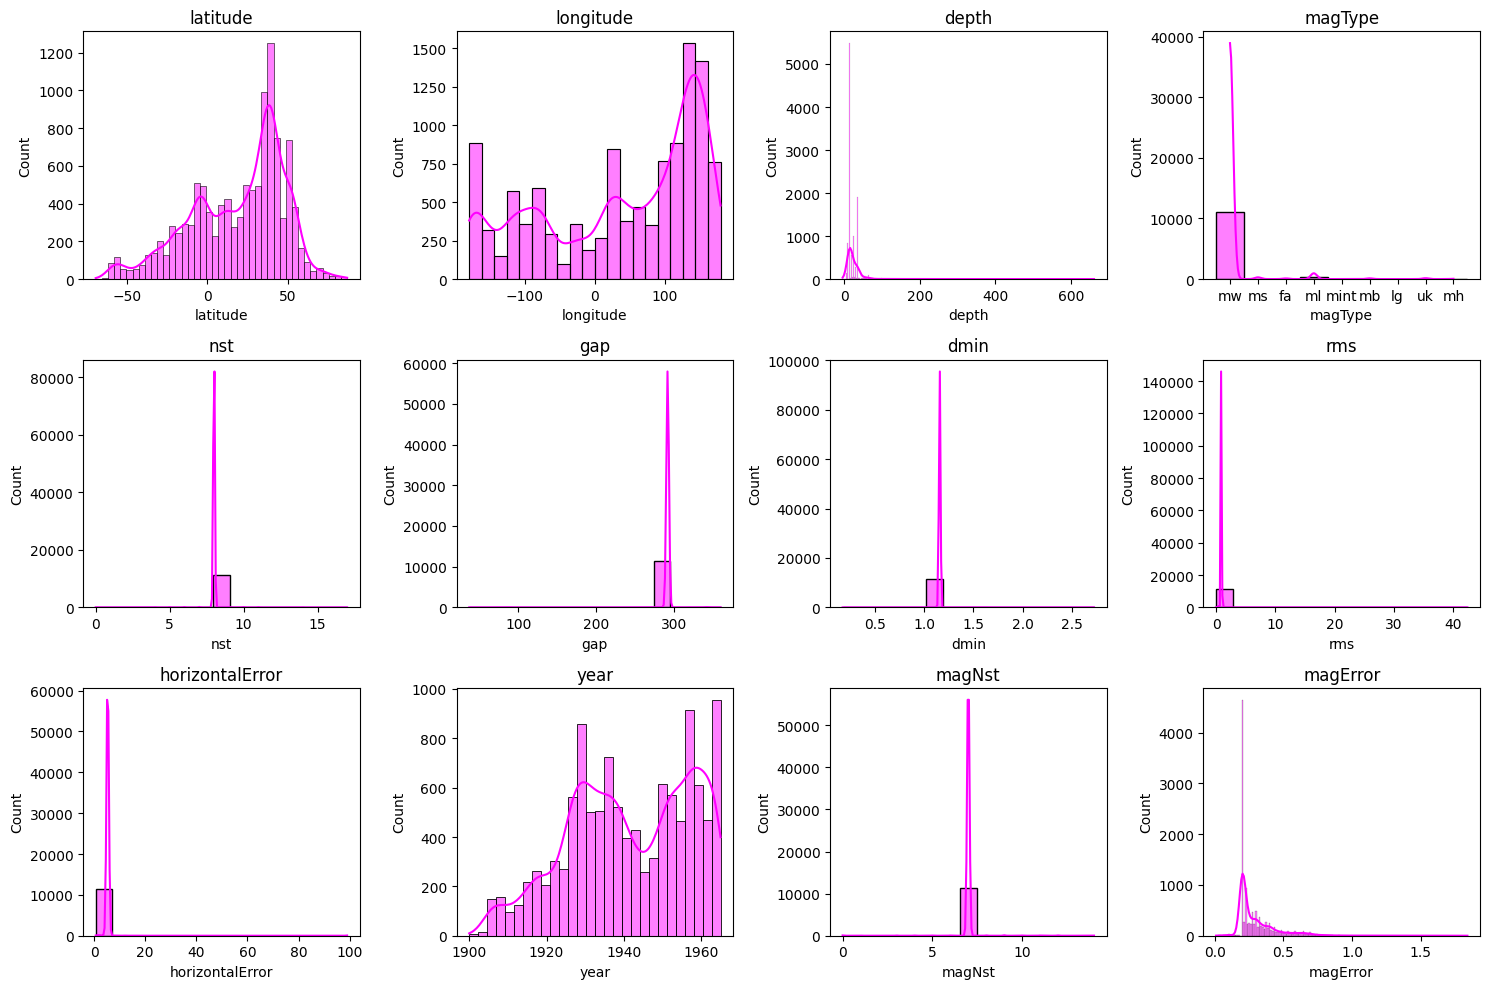

In [29]:
num_col=['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError','year','magNst','magError']

# Adjust the figsize to accommodate all columns
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows, 4 columns

for i, column in enumerate(num_col):
    row, col = divmod(i, 4)  # Calculate row and column index
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col], color='magenta')  # Access axes using row, col
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

Countplot  – Distribution of  Magnitude Types

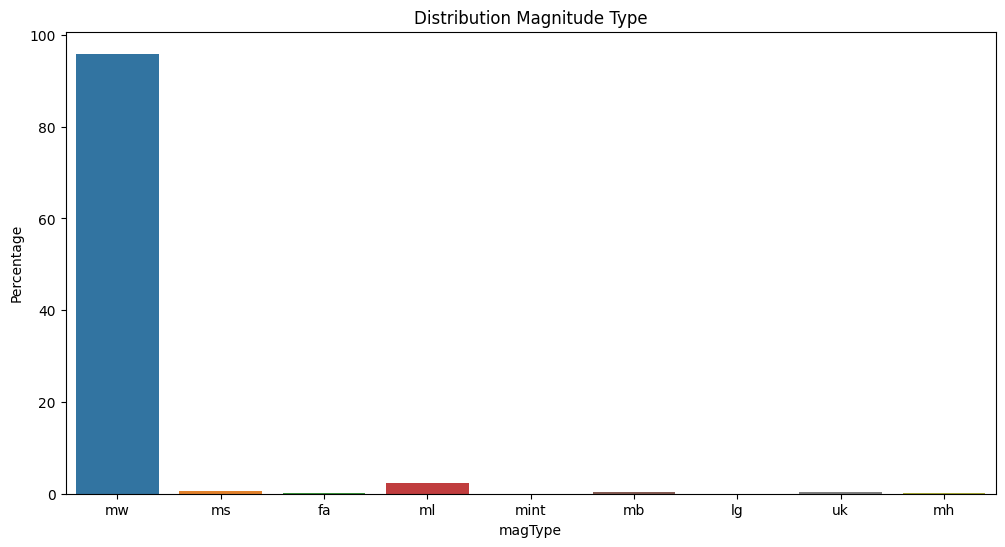

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x="magType", hue="magType", stat="percent")
plt.ylabel('Percentage')
plt.title('Distribution Magnitude Type')
plt.show()

Pie Chart – Earthquakes by Top 10 Countries

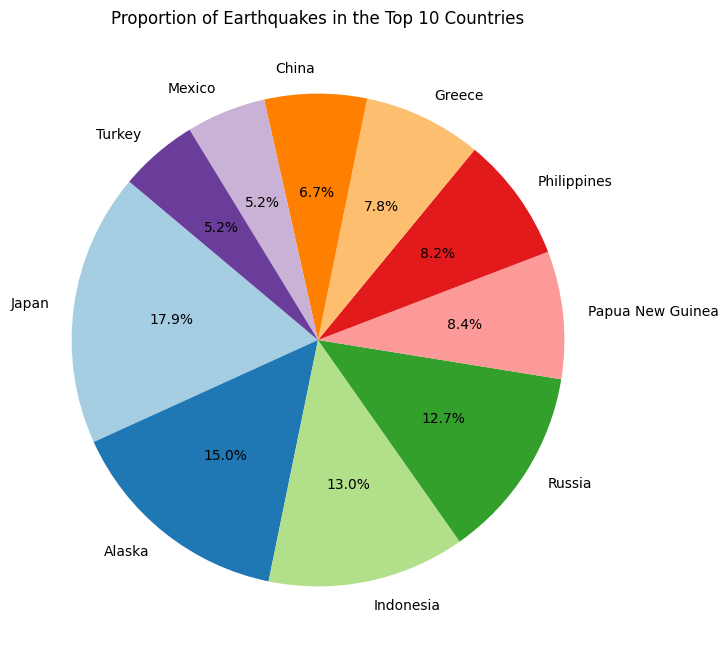

In [31]:
# Select the top 10 countries
top_countries = country_counts.head(10)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Earthquakes in the Top 10 Countries")
plt.show()

Violin Plot - Earthquake Magnitude Distribution per Country

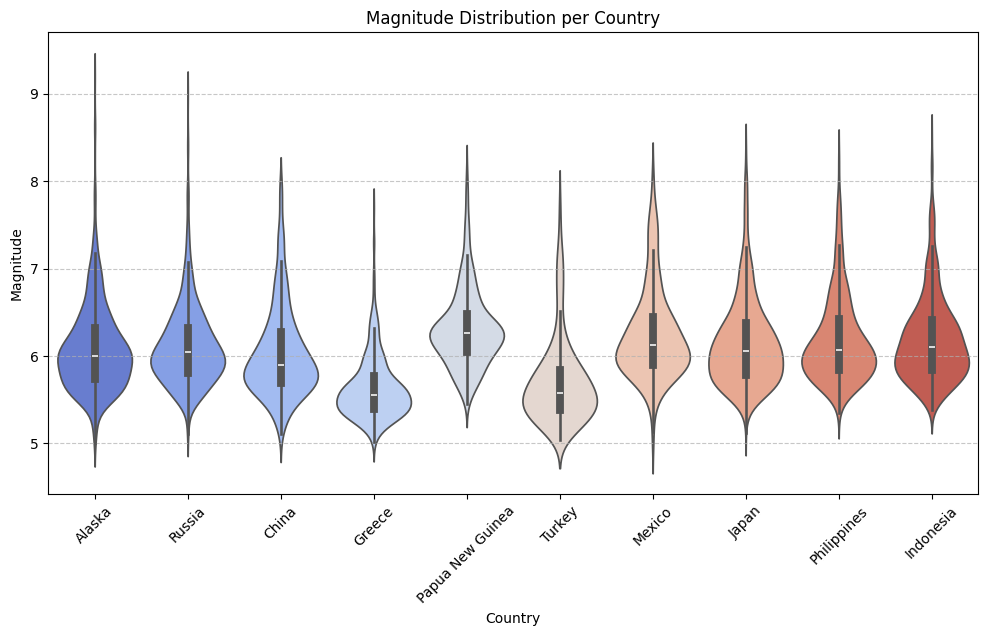

In [32]:
# Select top 10 countries with most earthquakes
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='mag', data=df_top, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Magnitude")
plt.title("Magnitude Distribution per Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Bivariate Analysis**

 Scatter Plot – Earthquake Magnitude  vs  Depth

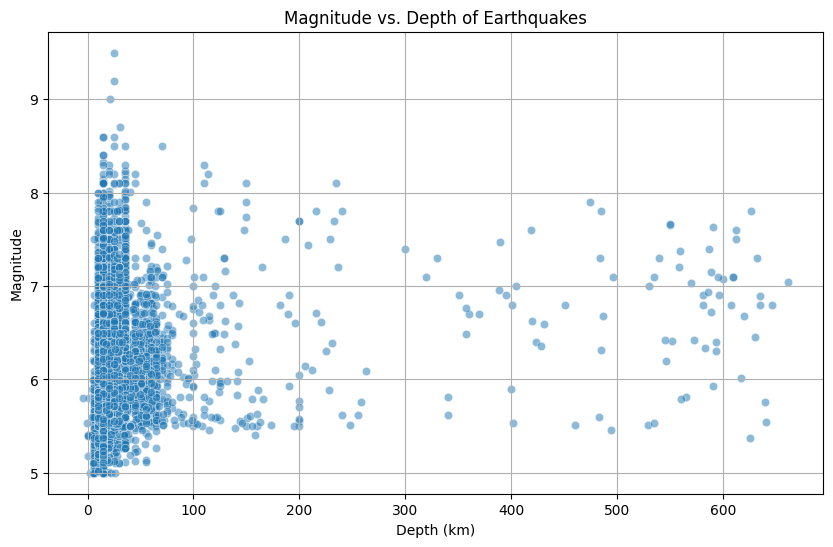

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["depth"], y=df["mag"], alpha=0.5)

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Depth of Earthquakes")
plt.grid(True)
plt.show()

The majority of earthquakes occur at depths less than 100 km (left side of the graph).

This suggests that shallow earthquakes are more frequent than deeper ones.

Magnitudes (5.0 to 9.0) appear randomly distributed across different depths.

This means that depth does not strongly influence the magnitude of an earthquake.

Both shallow and deep earthquakes can have high or low magnitudes.

 Line Plot – Earthquake Magnitude Trend Over Years

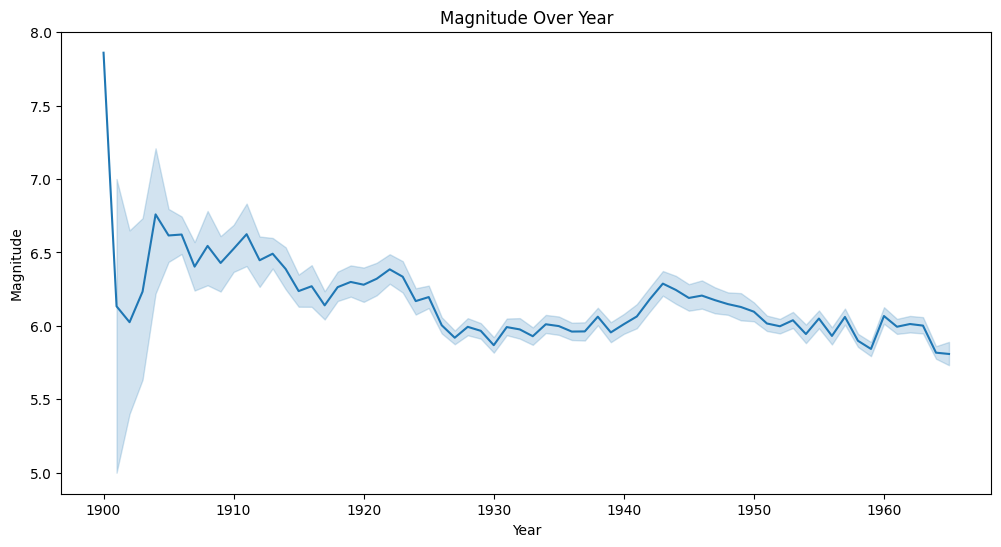

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mag', data=df)
plt.title('Magnitude Over Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.show()

 Line Plot – Yearly Trend of Major Earthquakes (Magnitude > 7)

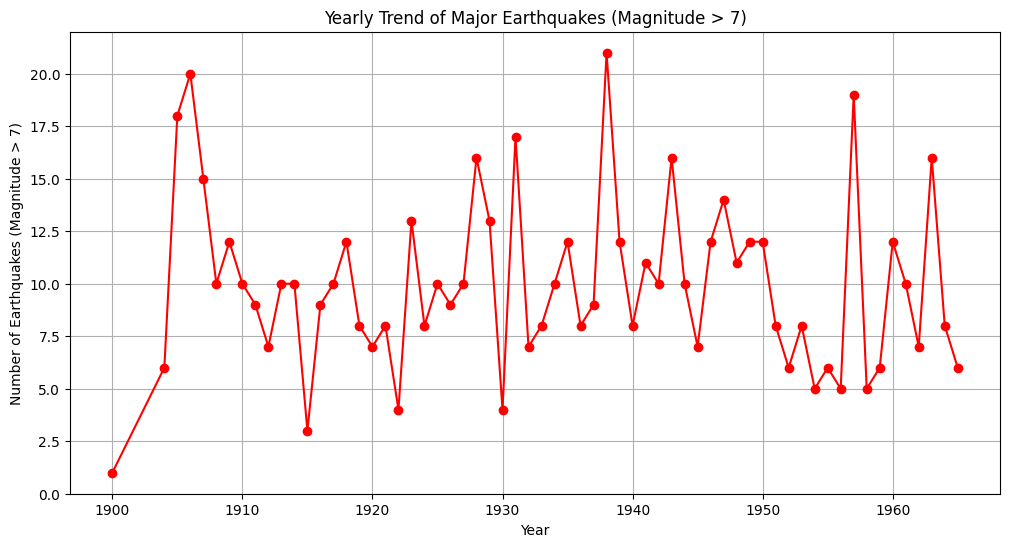

In [35]:
# Filter earthquakes with magnitude greater than 7
df_filtered = df[df['mag'] > 7]

# Count earthquakes per year
yearly_counts = df_filtered.groupby('year')['mag'].count()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='red')
# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes (Magnitude > 7)")
plt.title("Yearly Trend of Major Earthquakes (Magnitude > 7)")
plt.grid(True)
plt.show()

# **Multivariate Analysis**

 Animated World Map – Visualization of Earthquake Events

In [36]:
import plotly.express as px
fig = px.scatter_geo(df, lon='longitude', lat='latitude',size='mag', animation_frame='year', projection='natural earth',title='Earthquake Animation')

fig.update_geos(
  showcoastlines=True, coastlinecolor="Red",
showland=True, landcolor="rgb(200, 200, 200)",
showocean=True, oceancolor="rgb(100, 149, 237)",
showcountries=True, countrycolor="rgb(35, 35, 35)"
)

fig.update_layout(
    height=1000,
    width= 1000
)

fig.show()

 World Map – Global Distribution of Major Earthquakes (1900 to Present)

In [37]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 103.0 MB/s eta 0:00:00


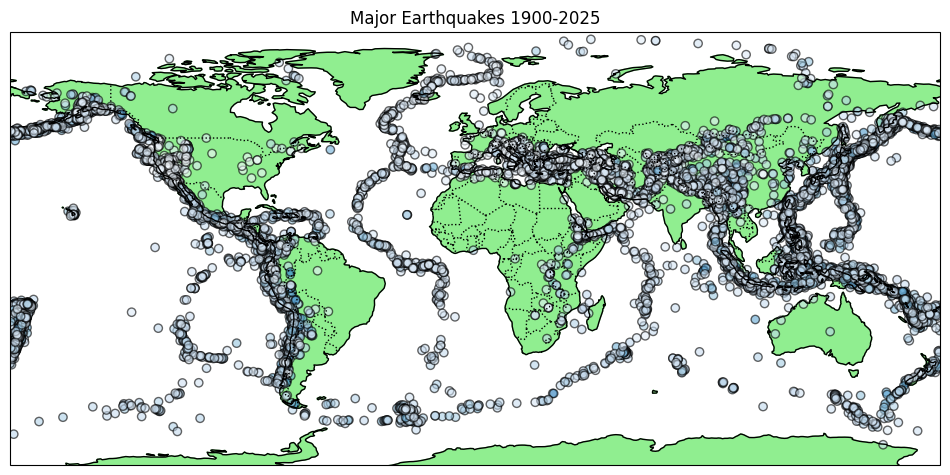

In [38]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature



# Create a figure and add a map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Add features: land, borders, and coastlines
ax.add_feature(cfeature.LAND, color="lightgreen")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE)

# Scatter plot of earthquake locations
sc = ax.scatter(df['longitude'], df['latitude'],
                c=df['mag'], cmap='Blues', alpha=0.6, edgecolors="black",
                transform=ccrs.PlateCarree())

# Add title
ax.set_title("Major Earthquakes 1900-2025")

# Show the plot
plt.show()


 World Map – Earthquake Locations and Magnitude Representation

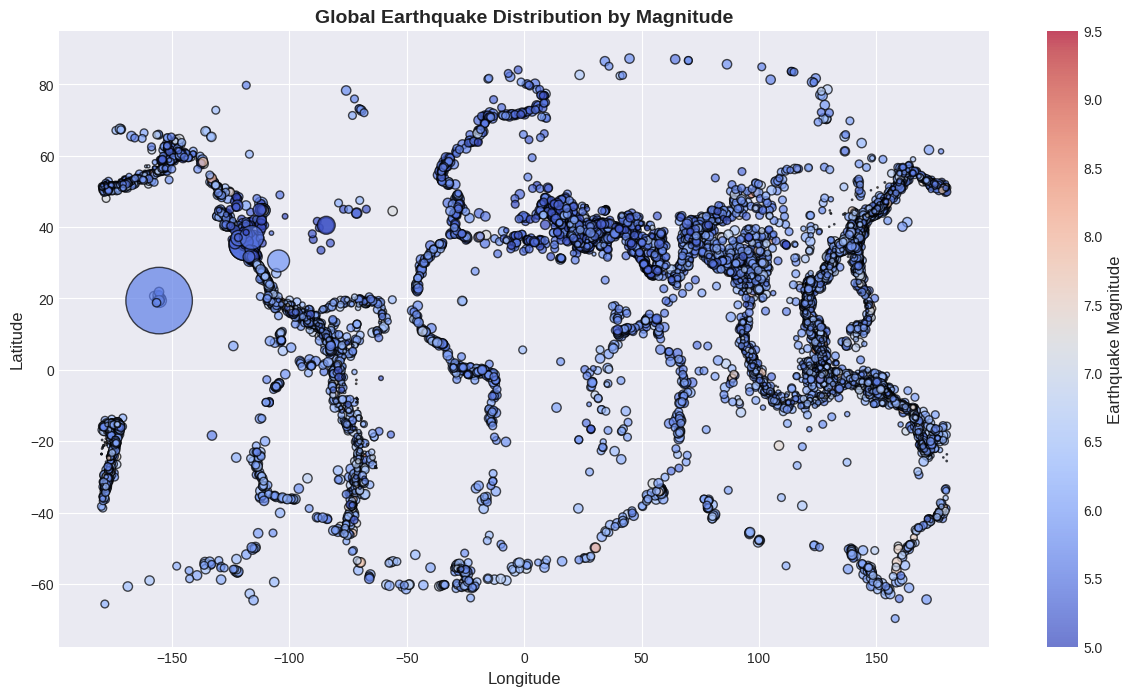

In [39]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

# Define plot size
plt.figure(figsize=(15, 8))

# Plot the scatter map using existing longitude and latitude
scatter = plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['mag'],
    cmap='coolwarm',
    s=(10 / (df['depth'] + 1)) * 50,
    alpha=0.7,
    edgecolors='k'
)

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label("Earthquake Magnitude", fontsize=12)

plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("Global Earthquake Distribution by Magnitude", fontsize=14, fontweight="bold")

plt.show()


In [40]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'locationSource', 'magSource',
       'year', 'month', 'country'],
      dtype='object')

Droping Columns which not taking for features

In [41]:
df.drop(columns=['time','magSource','locationSource','depthError','net','place','type'], axis=1, inplace=True)

# **Label Encoding**

In [42]:
le = LabelEncoder()
df['magType'] = le.fit_transform(df['magType'])
df['country'] = le.fit_transform(df['country'])
print(df)

       latitude  longitude  depth   mag  magType  nst    gap   dmin       rms  \
0        57.090   -153.480   15.0  7.86        7  8.0  292.0  1.156  0.903865   
1        36.000   -120.500   15.0  6.40        6  8.0  292.0  1.156  0.903865   
2        40.800   -115.700   15.0  5.00        0  8.0  292.0  1.156  0.903865   
3        52.000   -160.000   15.0  7.00        6  8.0  292.0  1.156  0.903865   
4        52.380   -167.450   15.0  7.00        6  8.0  292.0  1.156  0.903865   
...         ...        ...    ...   ...      ...  ...    ...    ...       ...   
11467    53.046    171.308   25.7  6.33        7  8.0  292.0  1.156  0.903865   
11468    -5.514    151.819   14.8  6.71        7  8.0  292.0  1.156  0.903865   
11469   -27.145   -177.262   15.0  5.58        7  8.0  292.0  1.156  0.903865   
11470    44.654    101.599   15.0  5.37        7  8.0  292.0  1.156  0.903865   
11471    38.399     28.226   10.0  5.81        7  8.0  292.0  1.156  0.903865   

       horizontalError  mag

**features and target Selection**

In [43]:
# Select relevant columns
features = ['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap','magError','dmin', 'rms', 'horizontalError', 'magNst', 'year']
target = 'mag'

In [44]:
# Features and target
X = df[features]
y = df[target]

Heatmap – Correlation Among Earthquake Features

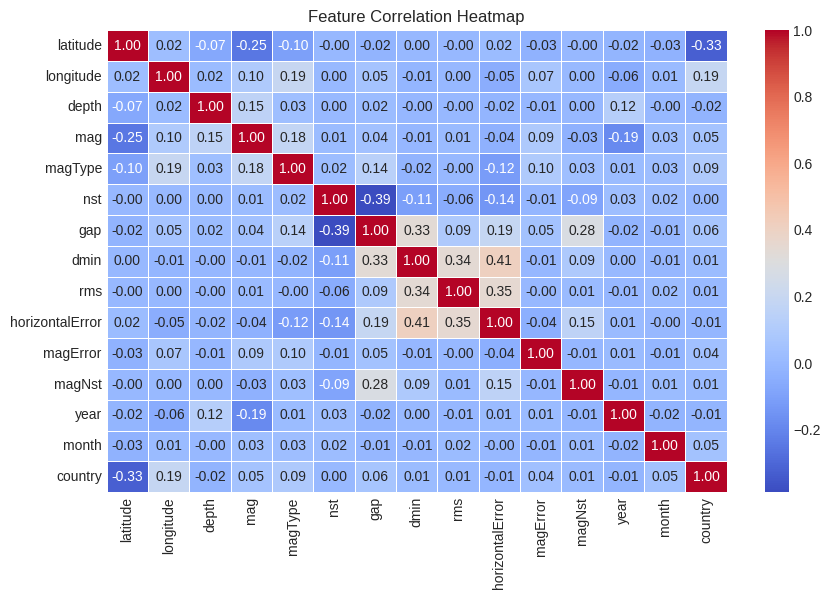

In [45]:
# Calculate the correlation matrix only for numerical features
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Standard Scaling**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X.head()

,latitude,longitude,depth,magType,nst,gap,magError,dmin,rms,horizontalError,magNst,year
0,57.09,-153.48,15.0,7,8.0,292.0,0.23,1.156,0.903865,5.315,7.0,1900
1,36.00,-120.50,15.0,6,8.0,292.0,0.23,1.156,0.903865,5.315,7.0,1901
2,40.80,-115.70,15.0,0,8.0,292.0,0.23,1.156,0.903865,5.315,7.0,1901
3,52.00,-160.00,15.0,6,8.0,292.0,0.23,1.156,0.903865,5.315,7.0,1901
4,52.38,-167.45,15.0,6,8.0,292.0,0.23,1.156,0.903865,5.315,7.0,1902


In [48]:
y.head()

,mag
0,7.86
1,6.40
2,5.00
3,7.00
4,7.00


In [49]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Model Selection**

# **Linear Regression**

In [50]:

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


In [51]:
print("r2 of linear regression",r2_lr)
print("mse of linear regression",mse_lr)
print("rmse of linear regression",rmse_lr)


r2 of linear regression 0.13064328102469192
mse of linear regression 0.24679203554856782
rmse of linear regression 0.49678167795176165


# **SVM**

In [52]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred_svm = svr.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print("r2 of linear regression",r2_svm)
print("mse of linear regression",mse_svm)
print("rmse of linear regression",rmse_svm)


r2 of linear regression 0.29835915055579687
mse of linear regression 0.1991810377476122
rmse of linear regression 0.4462970286116772


# **Desicion Tree**

In [53]:
from sklearn.tree import DecisionTreeRegressor


# Train the model
dt= DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)



In [54]:
print("r2 of Decison Tree",r2_dt)
print("mse of Decision Tree",mse_dt)
print("rmse of Decision Tree",rmse_dt)


r2 of Decison Tree -0.13183335840437294
mse of Decision Tree 0.3213036171752651
rmse of Decision Tree 0.56683649950869


# **Random Forest**

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf= rf.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("r2 of Decison Tree",r2_rf)
print("mse of Decision Tree",mse_rf)
print("rmse of Decision Tree",rmse_rf)

r2 of Decison Tree 0.37701234100338776
mse of Decision Tree 0.17685305597756337
rmse of Decision Tree 0.420539006487583


# **Hyper Tunning Random Forest**

In [56]:
# Select relevant columns
X = df[['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap',
        'dmin', 'rms', 'horizontalError','year','magNst','magError']]
y = df['mag']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_ht=RandomForestRegressor(
    n_estimators=1500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_ht.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1500, random_state=42)

In [59]:
y_pred_rfht = rf_ht.predict(X_test)

# Evaluation
r2_rfht = r2_score(y_test, y_pred_rfht)
mse_rfht = mean_squared_error(y_test, y_pred_rfht)
rmse_rfht = np.sqrt(mse_rfht)

print("r2 of Decison Tree",r2_rfht)
print("mse of Decision Tree",mse_rfht)
print("rmse of Decision Tree",rmse_rfht)

r2 of Decison Tree 0.41094427728866423
mse of Decision Tree 0.17599531387451306
rmse of Decision Tree 0.41951795417420823


Regression Model results

In [60]:
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM',"Random Forest Hyper Tuned" ],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_svm, r2_rfht],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svm, mse_rfht],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_svm, rmse_rfht]
})

print(regression_results)


                       Model  R2 Score       MSE      RMSE
0          Linear Regression  0.130643  0.246792  0.496782
1              Decision Tree -0.131833  0.321304  0.566836
2              Random Forest  0.377012  0.176853  0.420539
3                        SVM  0.298359  0.199181  0.446297
4  Random Forest Hyper Tuned  0.410944  0.175995  0.419518


Based on these results, the Random Forest models, especially the hyperparameter-tuned version, appear to be the most suitable for predicting the target variable in your dataset

In [61]:
import pickle

# Save trained RandomForestRegressor model
with open('earthquake_model.pkl', 'wb') as f:
    pickle.dump(rf_ht, f)
# Comprsesing the model
import joblib
joblib.dump(rf_ht, 'earthquake_model.pkl', compress=3)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('magType_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)